# Accidente Cerebrovascular

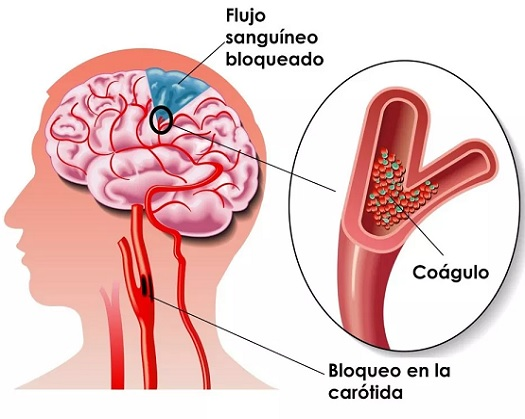

## Attribute Information

1) id: unique identifier


2) gender: "Male", "Female" or "Other"


3) age: age of the patient


4) hypertension: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension


5) heart_disease: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease


6) ever_married: "No" or "Yes"


7) work_type: "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"


8) Residence_type: "Rural" or "Urban"


9) avg_glucose_level: average glucose level in blood


10) bmi: body mass index


11) smoking_status: "formerly smoked", "never smoked", "smokes" or "Unknown"*


12) stroke: 1 if the patient had a stroke or 0 if not



* Note: "Unknown" in smoking_status means that the information is unavailable for this patient

In [116]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import LabelBinarizer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
import warnings
warnings.filterwarnings('ignore')


from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier

In [117]:
# Realizamos Carga de la información, el identificador unico del paciente no aporta 
# información relevante de la condición por lo que se eliminara
df=pd.read_csv('healthcare-dataset-stroke-data.csv').drop(columns='id')

- Tenemos 201 casos perdidos para la información de bmi (Indice de masa corporal), por lo que se realizara un dropna() de para eliminar esas filas de datos perdidos

In [118]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 439.3+ KB


In [119]:
df=df.dropna()
df=df.reset_index(drop=True)

# Graficamos primero la distribución bmi, age, avg_glucose_level

In [120]:
# Estilos disponibles para plt.style.use()
#print(plt.style.available)
plt.style.use('seaborn-whitegrid')

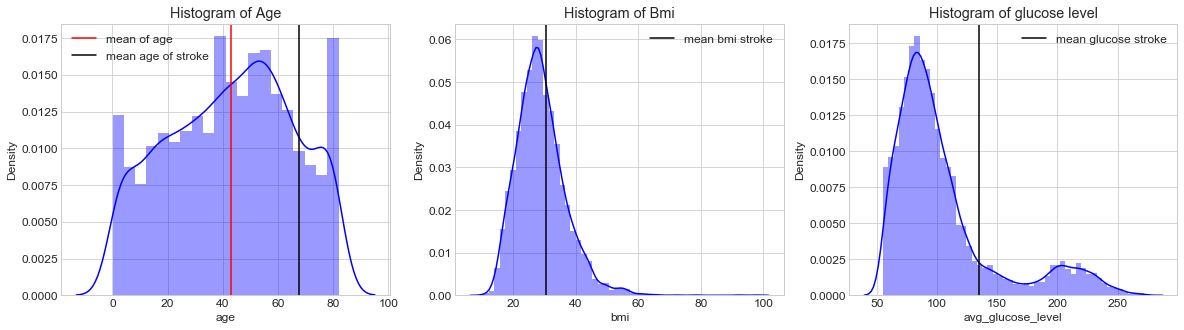

In [121]:
plt.rcParams.update({'font.size': 12}) 
plt.rcParams['figure.figsize']=(20,5)
plt.subplot(1,3,1)
sns.distplot(df['age'], kde=True, color='b')
plt.ylabel('Density')
plt.axvline(df['age'].mean(),color='r', label='mean of age')
plt.axvline(df['age'][df['stroke']==1].mean(), color='black', label='mean age of stroke')
plt.legend()
plt.title('Histogram of Age')

plt.subplot(1,3,2)
sns.distplot(df['bmi'], kde=True, color='b')
plt.ylabel('Density')
plt.axvline(df['bmi'][df['stroke']==1].mean(), color='black', label='mean bmi stroke')
plt.legend()
plt.title('Histogram of Bmi')



plt.subplot(1,3,3)
sns.distplot(df['avg_glucose_level'], kde=True, color='b')
plt.ylabel('Density')
plt.axvline(df['avg_glucose_level'][df['stroke']==1].mean(), color='black', label='mean glucose stroke')
plt.legend()
plt.title('Histogram of glucose level')

plt.show()



Se aprecian 3 cosas de acuerdo a los histogramas:

El indice de masa corporal  normal va de (18,5 a 25), sobrepeso de (25 a 30) y obesidad más de 30. Tenemos que nuestra media para un ataque es mayor a 30 por lo que sería más comun para gente obesa. 

El nivel de glucosa sangínea en ayunas por debajo de 100 mg/dl se considera normal, un nivel entre 100 y 125 mg/dL se considera prediabetes, un nivel de glucosa sobre los 126 mg/dL o superior indica diabetes tipo 2. En nuestro caso se presenta un promedio por sobre los 126 mg/dl por lo que se podría decir que el accidente cerebrovascular esta relacionado con la diabetes.

Por ultimo la edad promedio para que se presente esta condición es cercana a los 68 años por lo que es comun en gente mayor que en adultos jovenes.

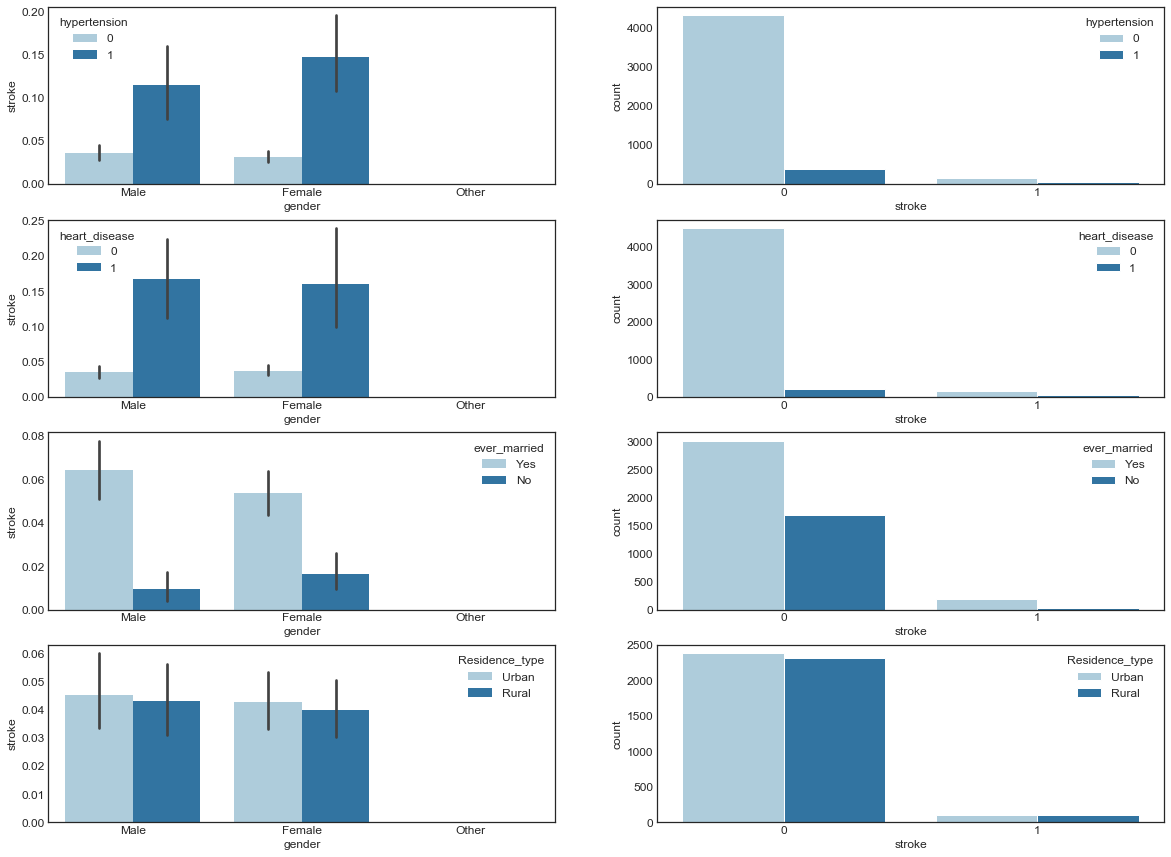

In [122]:
plt.rcParams['figure.figsize']=(20,15)
plt.style.use('seaborn-white')
plt.subplot(4,2,1)
sns.barplot(data=df,x="gender", y="stroke", hue="hypertension",palette="Paired")

plt.subplot(4,2,2)
sns.countplot(data=df,x="stroke", hue="hypertension",palette="Paired",edgecolor="white")


plt.subplot(4,2,3)
sns.barplot(data=df,x="gender", y="stroke", hue="heart_disease",palette="Paired")

plt.subplot(4,2,4)
sns.countplot(data=df,x="stroke", hue="heart_disease",palette="Paired",edgecolor="white")



plt.subplot(4,2,5)
sns.barplot(data=df,x="gender", y="stroke", hue="ever_married",palette="Paired")

plt.subplot(4,2,6)
sns.countplot(data=df,x="stroke", hue="ever_married",palette="Paired",edgecolor="white")

plt.subplot(4,2,7)
sns.barplot(data=df,x="gender", y="stroke", hue="Residence_type",palette="Paired")

plt.subplot(4,2,8)
sns.countplot(data=df,x="stroke", hue="Residence_type",palette="Paired",edgecolor="white")


plt.show()

Se observa que la presencia de enfermedades cardiacas y hipertensión estan relacionadas con la ocurrencia de un accidente cerebrovascular, por otro lado en menor medida se tiene un aumento de los casos de accidente cardiovascular por el lugar donde se vive lo que se puede asociar a estres.


El Anillo para conquistarlos a todos:


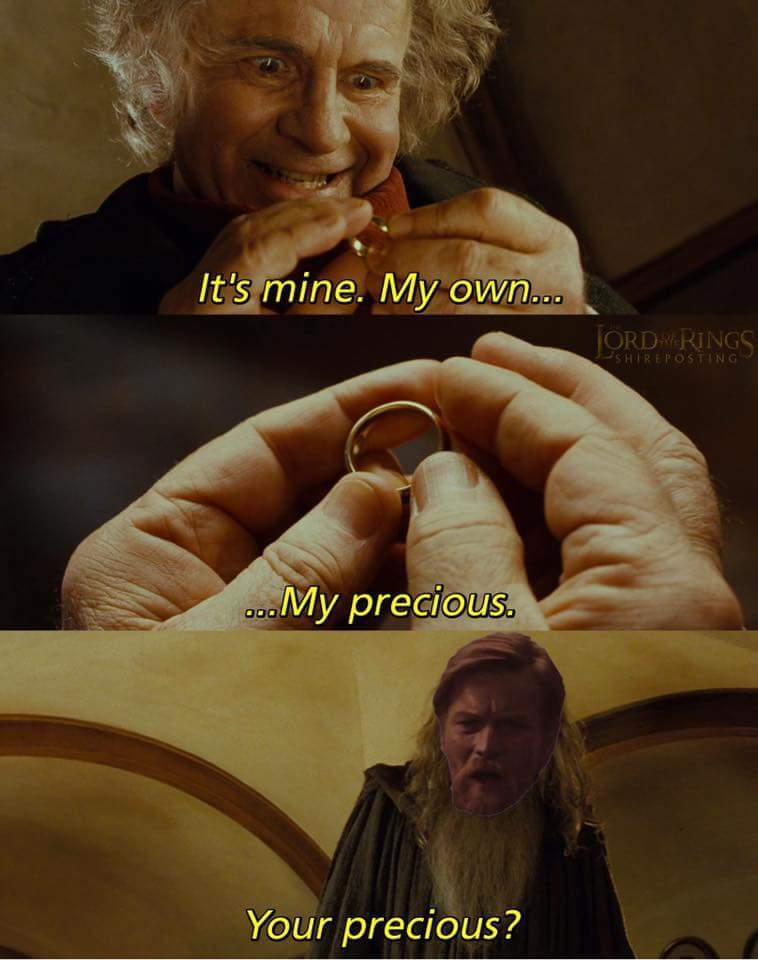

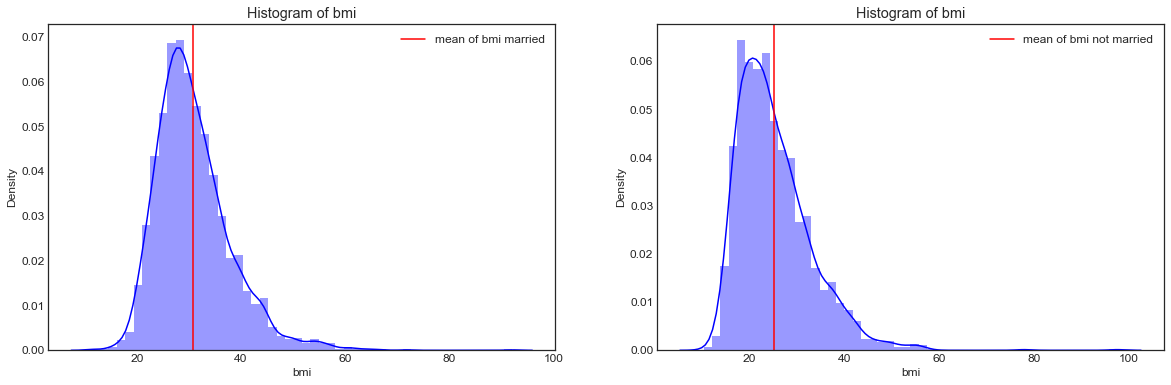

In [123]:
plt.rcParams['figure.figsize']=(20,6)

plt.subplot(1,2,1)

sns.distplot(df['bmi'][df['ever_married']=='Yes'], kde=True, color='b')
plt.ylabel('Density')
plt.axvline(df['bmi'][df['ever_married']=='Yes'].mean(),color='r', label='mean of bmi married')
plt.legend()
plt.title('Histogram of bmi')

plt.subplot(1,2,2)
sns.distplot(df['bmi'][df['ever_married']=='No'], kde=True, color='b')
plt.ylabel('Density')
plt.axvline(df['bmi'][df['ever_married']=='No'].mean(),color='r', label='mean of bmi not married')
plt.legend()
plt.title('Histogram of bmi')

plt.show()

Sucede que el matrimonio engorda a las personas es un hecho comprobado, que la tendencia es engordar algunos kilos al casarse y tener una vida más sedentaria.

Como podemos ver que el promedio de indice de masa corporal es más cercano al rango normal para las personas que se encuentran casadas. En el caso de las personas que contragieron matrimonio el promedio es cercano a la obsesidad y junto con esta vienen por lo general las otras enfermedades asociadas.

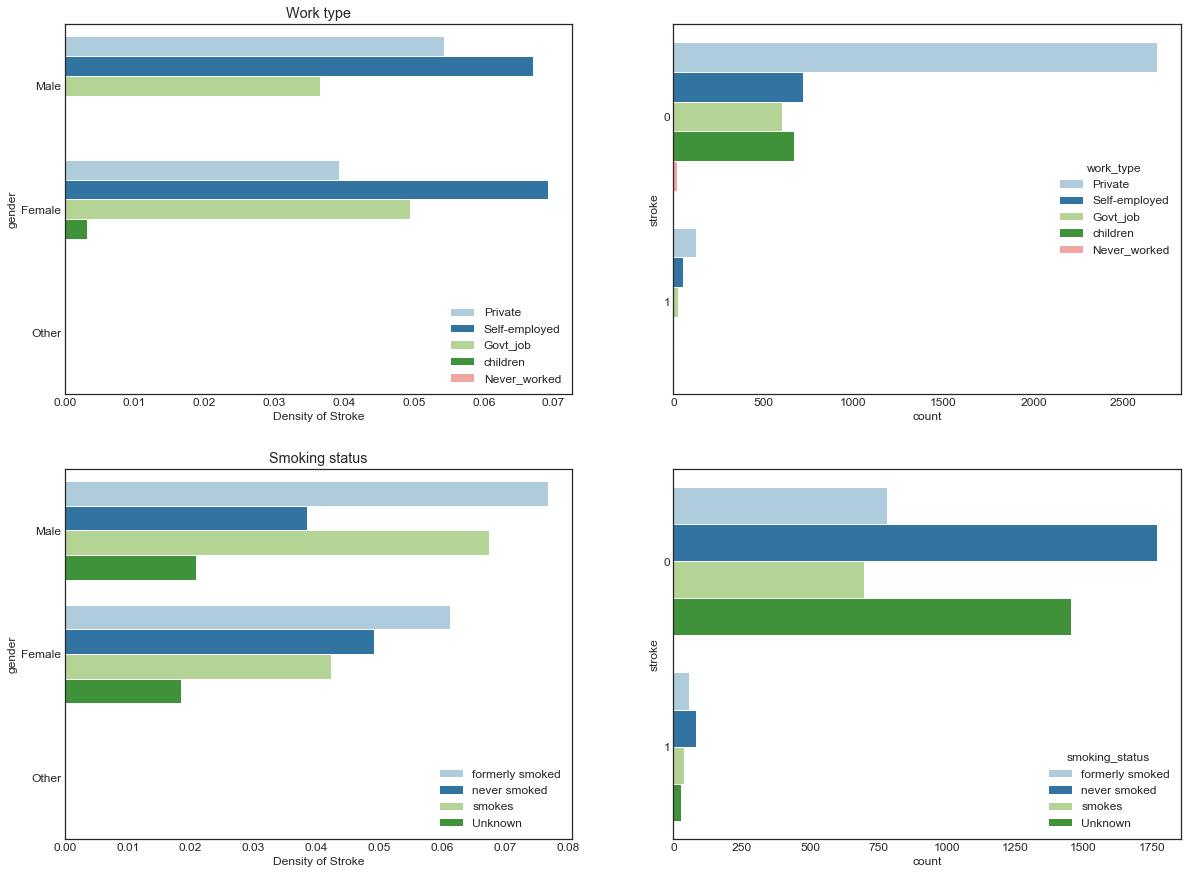

In [124]:
plt.rcParams['figure.figsize']=(20,15)
plt.subplot(2,2,1)
sns.barplot(data=df,x="stroke", y="gender", hue="work_type",palette="Paired",edgecolor="white",ci=None)
plt.xlabel('Density of Stroke')
plt.legend(loc='lower right')
plt.title('Work type')


plt.subplot(2,2,2)
sns.countplot(data=df,y="stroke", hue="work_type",palette="Paired",edgecolor="white")




plt.subplot(2,2,3)
sns.barplot(data=df,x="stroke", y="gender", hue="smoking_status",palette="Paired",edgecolor="white",ci=None)
plt.xlabel('Density of Stroke')
plt.title('Smoking status')
plt.legend(loc='lower right')

plt.subplot(2,2,4)
sns.countplot(data=df,y="stroke", hue="smoking_status",palette="Paired",edgecolor="white")


plt.show()

Se observa que en los casos de trabajadores por cuenta propia son más propensos a la ocurrencia de un accidente cerebrovascular, lo que se puede deber al nivel de estres que maneja la persona.

Por otro lado en el caso de los fumadores frecuentes se aprecia que hay un aumento significativo en la posibilidad de ocurrencia de un accidente cerebrovascular.

## Antes de continuar vamos a apreciar cuantos casos de accidente cerebrovascular tenemos en nuestra data

In [125]:
df_atack= pd.DataFrame(df['gender'][df['stroke']==1].value_counts())
df_atack= df_atack.rename_axis("label").reset_index()
df_atack.replace(['Female','Male'],['Female stroke','Male stroke'], inplace =True)
df_no_atack=pd.DataFrame( df['gender'][df['stroke']==0].value_counts())
df_no_atack= df_no_atack.rename_axis("label").reset_index()

In [126]:
df_cantidad=pd.concat([df_atack,df_no_atack])

In [127]:
fig = px.pie(df_cantidad, values='gender', names='label', title='Number of cases in the data')
fig.show()

Vemos que existe un gran desbalance entre las clases lo que nos va a perdjudicar cuando realicemos nuestro modelos de clasificación para identificar los casos de stroke lo que se resolvera realizando un aumento (oversampling) de la clase que presenta menos caso que se realizara al X_train cuando se realice el split de la información.

# Transformamos las columnas categoricas

Para esto utilizaremos LabelBinarizer para que nos queden entre 0 y 1.

In [128]:
category=df.dtypes=='object'
category= list(category[category].index)
print(category)

['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']


In [129]:
df_mod=df.copy()

Vamos a realizar una copia para mantener el DataFrame original y vamos a crear la función de LabelBinarizer

In [130]:
gender=LabelBinarizer()
ever_married=LabelBinarizer()
Residence_type=LabelBinarizer()

df_mod['gender']=gender.fit_transform(df_mod['gender'])
df_mod['ever_married']=ever_married.fit_transform(df_mod['ever_married'])
df_mod['Residence_type']=Residence_type.fit_transform(df_mod['Residence_type'])

In [131]:
smoking_status=LabelBinarizer().fit(df_mod['smoking_status'])
df_mod=pd.concat( [df_mod.drop(columns='smoking_status'), pd.DataFrame(smoking_status.transform(df_mod['smoking_status']),
                                                           columns=smoking_status.classes_)], axis=1)

In [132]:
work_type=LabelBinarizer().fit(df_mod['work_type'])
df_mod=pd.concat( [df_mod.drop(columns='work_type'), pd.DataFrame(work_type.transform(df_mod['work_type']),
                                                           columns=work_type.classes_)], axis=1)

In [133]:
df_mod.head()

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,Unknown,formerly smoked,never smoked,smokes,Govt_job,Never_worked,Private,Self-employed,children
0,0,67.0,0,1,1,1,228.69,36.6,1,0,1,0,0,0,0,1,0,0
1,0,80.0,0,1,1,0,105.92,32.5,1,0,0,1,0,0,0,1,0,0
2,1,49.0,0,0,1,1,171.23,34.4,1,0,0,0,1,0,0,1,0,0
3,1,79.0,1,0,1,0,174.12,24.0,1,0,0,1,0,0,0,0,1,0
4,0,81.0,0,0,1,1,186.21,29.0,1,0,1,0,0,0,0,1,0,0


hay variables que son mucho más grandes que uno por lo que se utilizara standarscaler para reescalarlas a un rango entre 0 y 1 desviación estandar, en otro caso el peso de la variable afectaría demasiado el modelo.

In [134]:
y=df_mod['stroke']
df_mod=df_mod.drop(columns='stroke')
Standar=StandardScaler()
datos_escalados=Standar.fit_transform(df_mod)
column=df_mod.columns

In [135]:
X=pd.DataFrame(datos_escalados,columns=column)

In [136]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1125)

## Se realiza oversampling 

In [137]:
# utilizamos smote() para balanzer la clase minoritaria.
X_resampled, y_resampled = SMOTE().fit_resample(X, y)

In [138]:
lin_svc = LinearSVC()
lin_svc.fit(X_resampled, y_resampled)
Y_pred = lin_svc.predict(X_test)

In [139]:
print(classification_report(y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.99      0.73      0.84      1410
           1       0.12      0.83      0.21        63

    accuracy                           0.74      1473
   macro avg       0.56      0.78      0.53      1473
weighted avg       0.95      0.74      0.82      1473



In [140]:
svc = LinearSVC()
parameters={'penalty':('l1', 'l2'),
            'C':[0.009,0.12,0.2,0.5,1],
           'class_weight':('balanced',None)}
clf=GridSearchCV(svc,param_grid=parameters,
                cv=5)
clf.fit(X_resampled, y_resampled)

GridSearchCV(cv=5, estimator=LinearSVC(),
             param_grid={'C': [0.009, 0.12, 0.2, 0.5, 1],
                         'class_weight': ('balanced', None),
                         'penalty': ('l1', 'l2')})

In [141]:
clf_best = clf.best_estimator_

In [142]:
Y_pred = clf_best.predict(X_test)
print(classification_report(y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.99      0.73      0.84      1410
           1       0.12      0.83      0.21        63

    accuracy                           0.74      1473
   macro avg       0.56      0.78      0.53      1473
weighted avg       0.95      0.74      0.82      1473



# AdaBoost Classifier (Adaptive Boosting)

In [143]:
abc_params = {'learning_rate': [0.01, 0.1, 1], 
              'n_estimators': [50, 100, 500, 1000]}

model_abc = GridSearchCV(AdaBoostClassifier(random_state=1234),
                         abc_params,
                         cv=5,
                         n_jobs=-1
                        ).fit(X_resampled, y_resampled)

In [144]:
bes_ada=model_abc.best_estimator_

In [145]:
Y_pred = bes_ada.predict(X_test)
print(classification_report(y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.96      0.94      0.95      1410
           1       0.13      0.22      0.17        63

    accuracy                           0.91      1473
   macro avg       0.55      0.58      0.56      1473
weighted avg       0.93      0.91      0.92      1473



# GradientBoosting Classifier

In [146]:
gbc_params = {'learning_rate': [0.01, 0.1, 0.5], 
              'n_estimators': [50, 100, 500], 
              'subsample': [0.1,0.5,0.9],
              'max_features': ['sqrt', 'log2']}
 

gs_gbc2 = GridSearchCV(GradientBoostingClassifier(), 
                       gbc_params, 
                       n_jobs=-1,
                       cv=5).fit(X_resampled, y_resampled)

In [147]:
best_gbc2 = gs_gbc2.best_estimator_

In [148]:
best_gbc2

GradientBoostingClassifier(learning_rate=0.5, max_features='sqrt',
                           n_estimators=500, subsample=0.9)

In [149]:
Y_pred = best_gbc2.predict(X_test)
print(classification_report(y_test, Y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1410
           1       0.94      0.95      0.94        63

    accuracy                           1.00      1473
   macro avg       0.97      0.97      0.97      1473
weighted avg       1.00      1.00      1.00      1473



In [151]:
def plot_cm(y_true, y_pred, figsize=(8,8)):
    cm = confusion_matrix(y_true, y_pred, labels=np.unique(y_true))
    cm_sum = np.sum(cm, axis=1, keepdims=True)
    cm_perc = cm / cm_sum.astype(float) * 100
    annot = np.empty_like(cm).astype(str)
    nrows, ncols = cm.shape
    for i in range(nrows):
        for j in range(ncols):
            c = cm[i, j]
            p = cm_perc[i, j]
            if i == j:
                s = cm_sum[i]
                annot[i, j] = '%.1f%%\n%d/%d' % (p, c, s)
            elif c == 0:
                annot[i, j] = '0.0%'
            else:
                annot[i, j] = '%.1f%%\n%d' % (p, c)
    cm = pd.DataFrame(cm, index=np.unique(y_true), columns=np.unique(y_true))
    cm.index.name = 'Valores Verdaderos'
    cm.columns.name = 'Prediccion'
    fig, ax = plt.subplots(figsize=figsize)
    sns.heatmap(cm, cmap= "YlGnBu", annot=annot, fmt='', ax=ax)

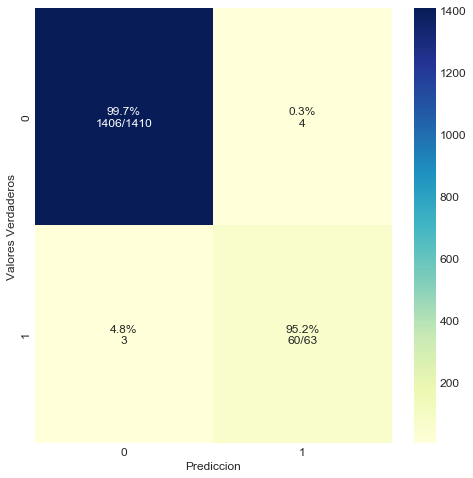

In [152]:
plot_cm(y_test,Y_pred)

In [154]:
variables = pd.DataFrame({'var':X_resampled.columns,'importance':best_gbc2.feature_importances_}).sort_values(by='importance', ascending=False)

Text(0.5, 1.0, 'Feature Importances for Delay Clasification')

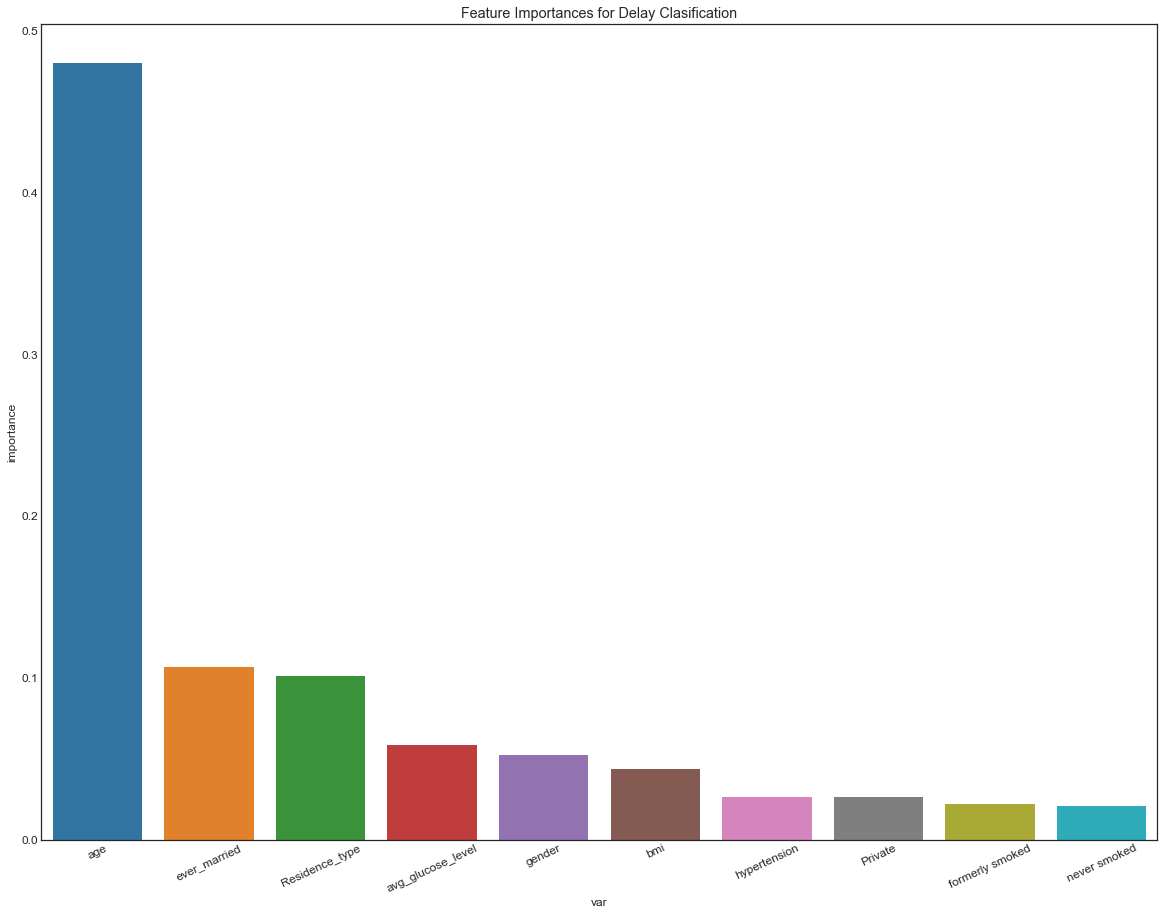

In [155]:
sns.barplot(variables.head(10)['var'], variables.head(10)['importance'])
plt.xticks(rotation=25)
# plt.show()
plt.title("Feature Importances for Delay Clasification")

# Conclusion


Es altamente probable que el modelo Adaboost tenga overfitting lo ideal sería probarlo con más datos para verificar su resultado, lamentablemente se cuenta con muy pocos datos de stroke :c